# Data Preprocessing, EDA, and Feature Engineering

This notebook contains:
1. **Data Loading and Initial Exploration**
2. **Comprehensive Exploratory Data Analysis (EDA)**
3. **Data Cleaning and Preprocessing**
4. **Feature Engineering**
5. **Feature Selection**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration
CSV_PATH = r"data\train(1)(train(1)).csv"
print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Exploration


In [2]:
# Load the dataset
df = pd.read_csv(CSV_PATH)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")


DATASET OVERVIEW
Shape: (16209, 21)

Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Data Types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors

## 2. Exploratory Data Analysis (EDA)


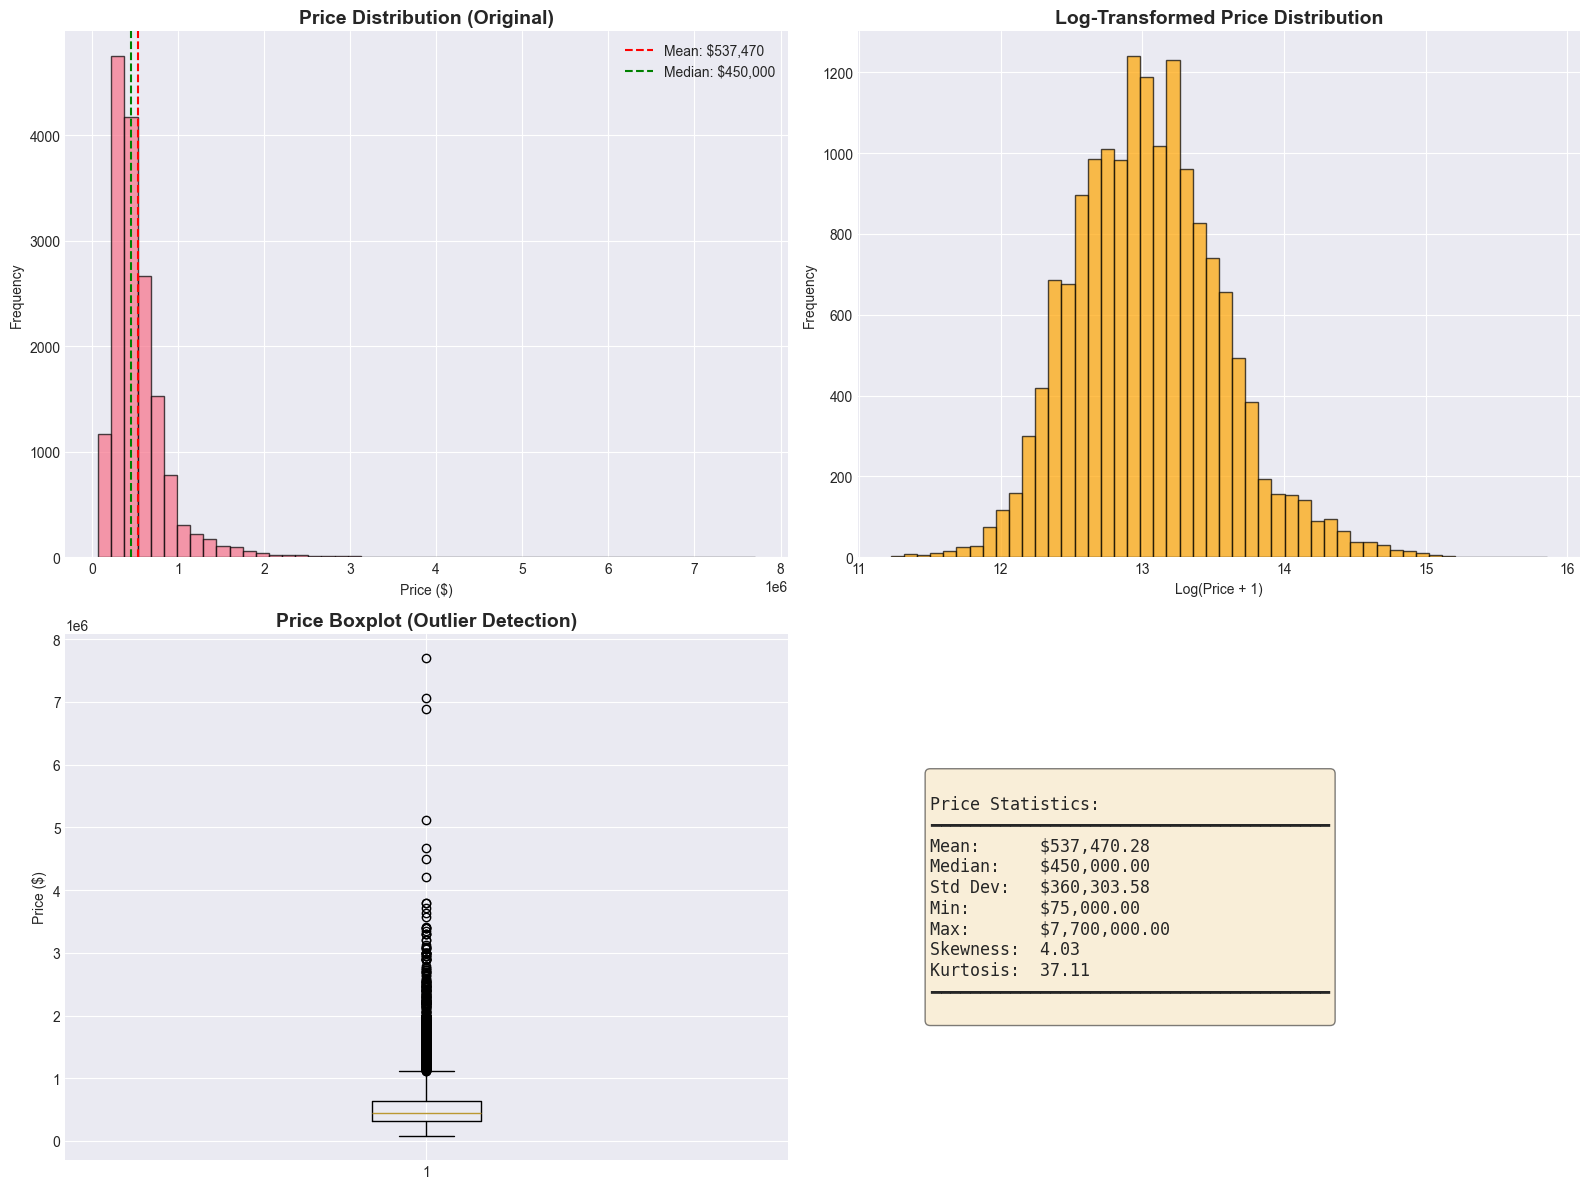

Price Skewness: 4.03 (High skewness indicates need for log transformation)
Price Kurtosis: 37.11


In [3]:
# Target Variable Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution
axes[0, 0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Price Distribution (Original)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():,.0f}')
axes[0, 0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():,.0f}')
axes[0, 0].legend()

# Log-transformed price distribution
axes[0, 1].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Log-Transformed Price Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log(Price + 1)')
axes[0, 1].set_ylabel('Frequency')

# Price boxplot
axes[1, 0].boxplot(df['price'], vert=True)
axes[1, 0].set_title('Price Boxplot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Price ($)')

# Price statistics
price_stats = df['price'].describe()
axes[1, 1].axis('off')
stats_text = f"""
Price Statistics:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Mean:      ${price_stats['mean']:,.2f}
Median:    ${price_stats['50%']:,.2f}
Std Dev:   ${price_stats['std']:,.2f}
Min:       ${price_stats['min']:,.2f}
Max:       ${price_stats['max']:,.2f}
Skewness:  {df['price'].skew():.2f}
Kurtosis:  {df['price'].kurtosis():.2f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace', 
                verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Price Skewness: {df['price'].skew():.2f} (High skewness indicates need for log transformation)")
print(f"Price Kurtosis: {df['price'].kurtosis():.2f}")


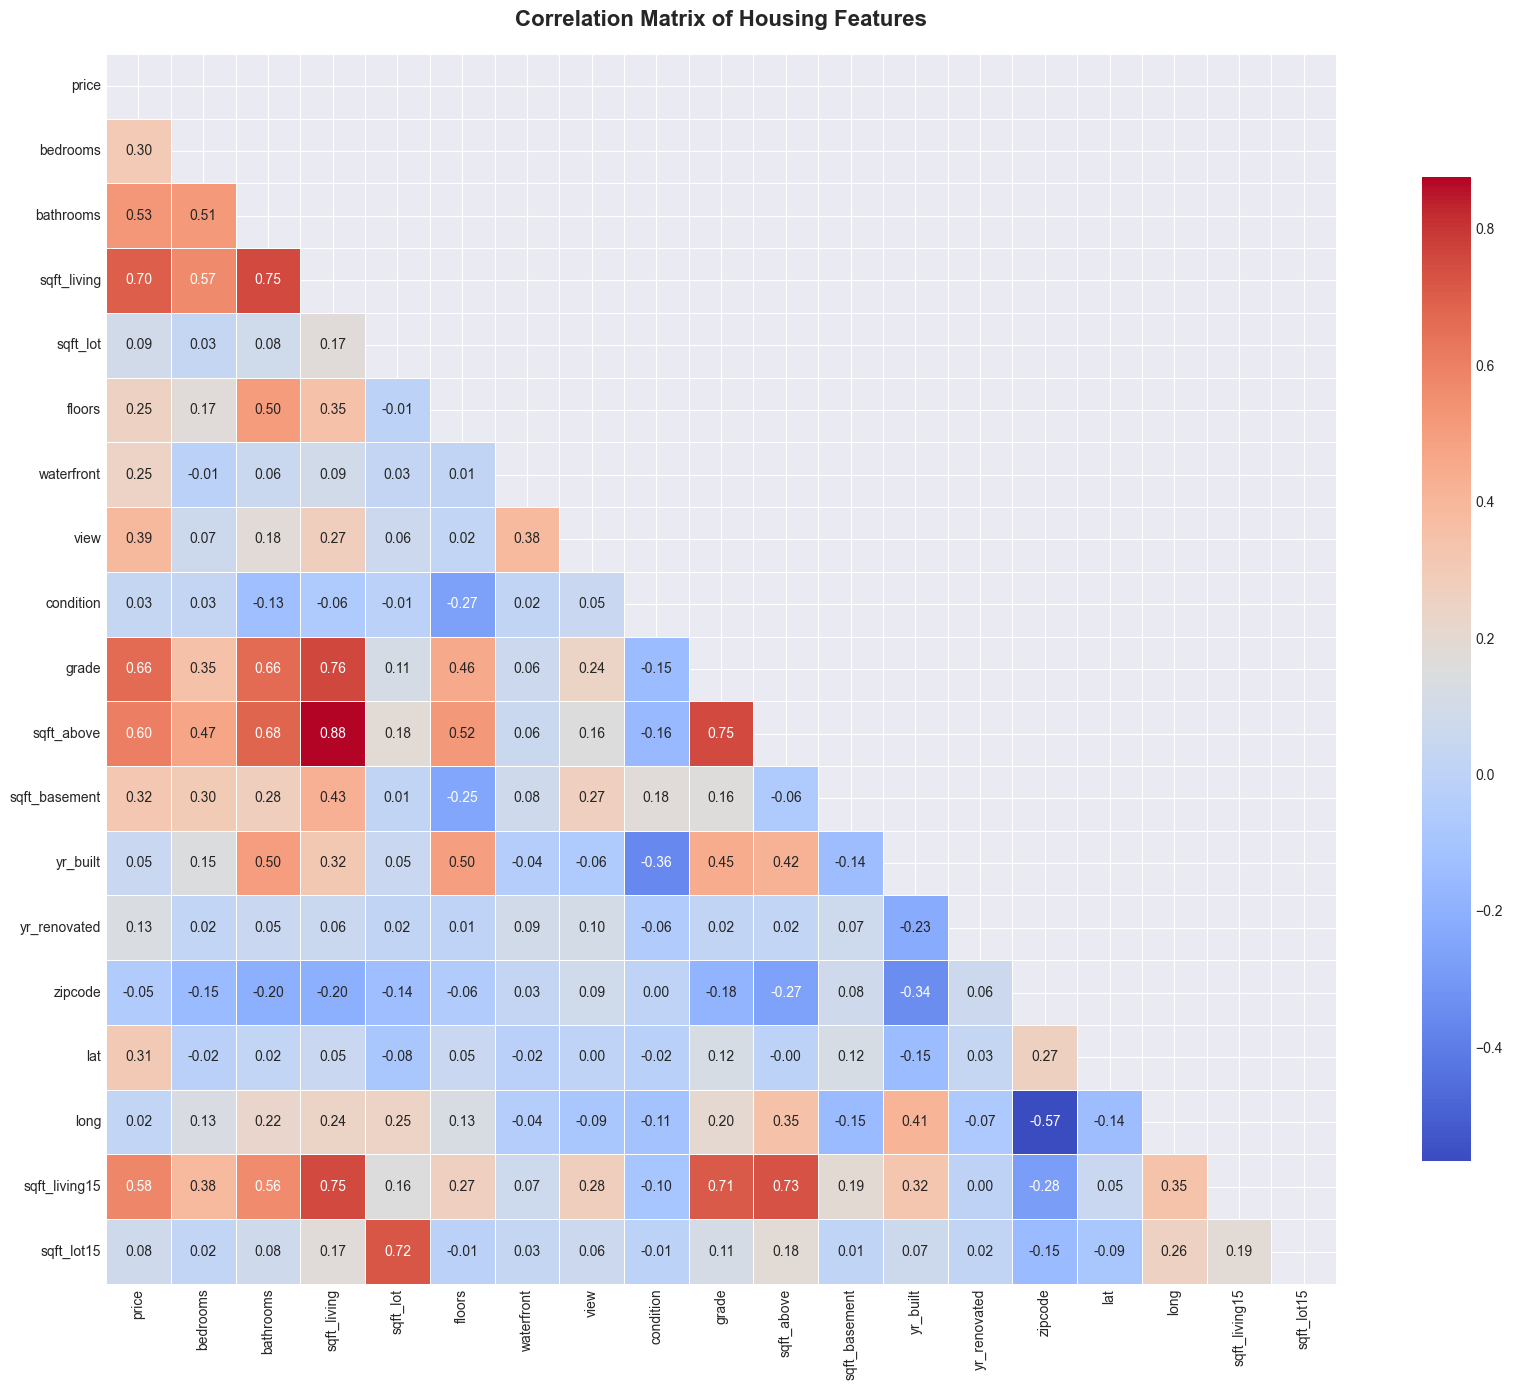


TOP CORRELATIONS WITH PRICE (Before Transformation)
sqft_living              :  0.7009
grade                    :  0.6643
sqft_above               :  0.6026
sqft_living15            :  0.5818
bathrooms                :  0.5255
view                     :  0.3905
sqft_basement            :  0.3203
lat                      :  0.3100
bedrooms                 :  0.3045
floors                   :  0.2514
waterfront               :  0.2452
yr_renovated             :  0.1331
sqft_lot                 :  0.0885
sqft_lot15               :  0.0761
yr_built                 :  0.0483
condition                :  0.0313
long                     :  0.0243
zipcode                  : -0.0545


In [4]:
# Correlation Analysis
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')
df_numeric = df_numeric.fillna(df_numeric.median())

# Full correlation matrix
plt.figure(figsize=(18, 14))
correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Housing Features", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Price correlations sorted
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("\n" + "="*60)
print("TOP CORRELATIONS WITH PRICE (Before Transformation)")
print("="*60)
for feature, corr in price_correlations.items():
    if feature != 'price':
        print(f"{feature:25s}: {corr:7.4f}")


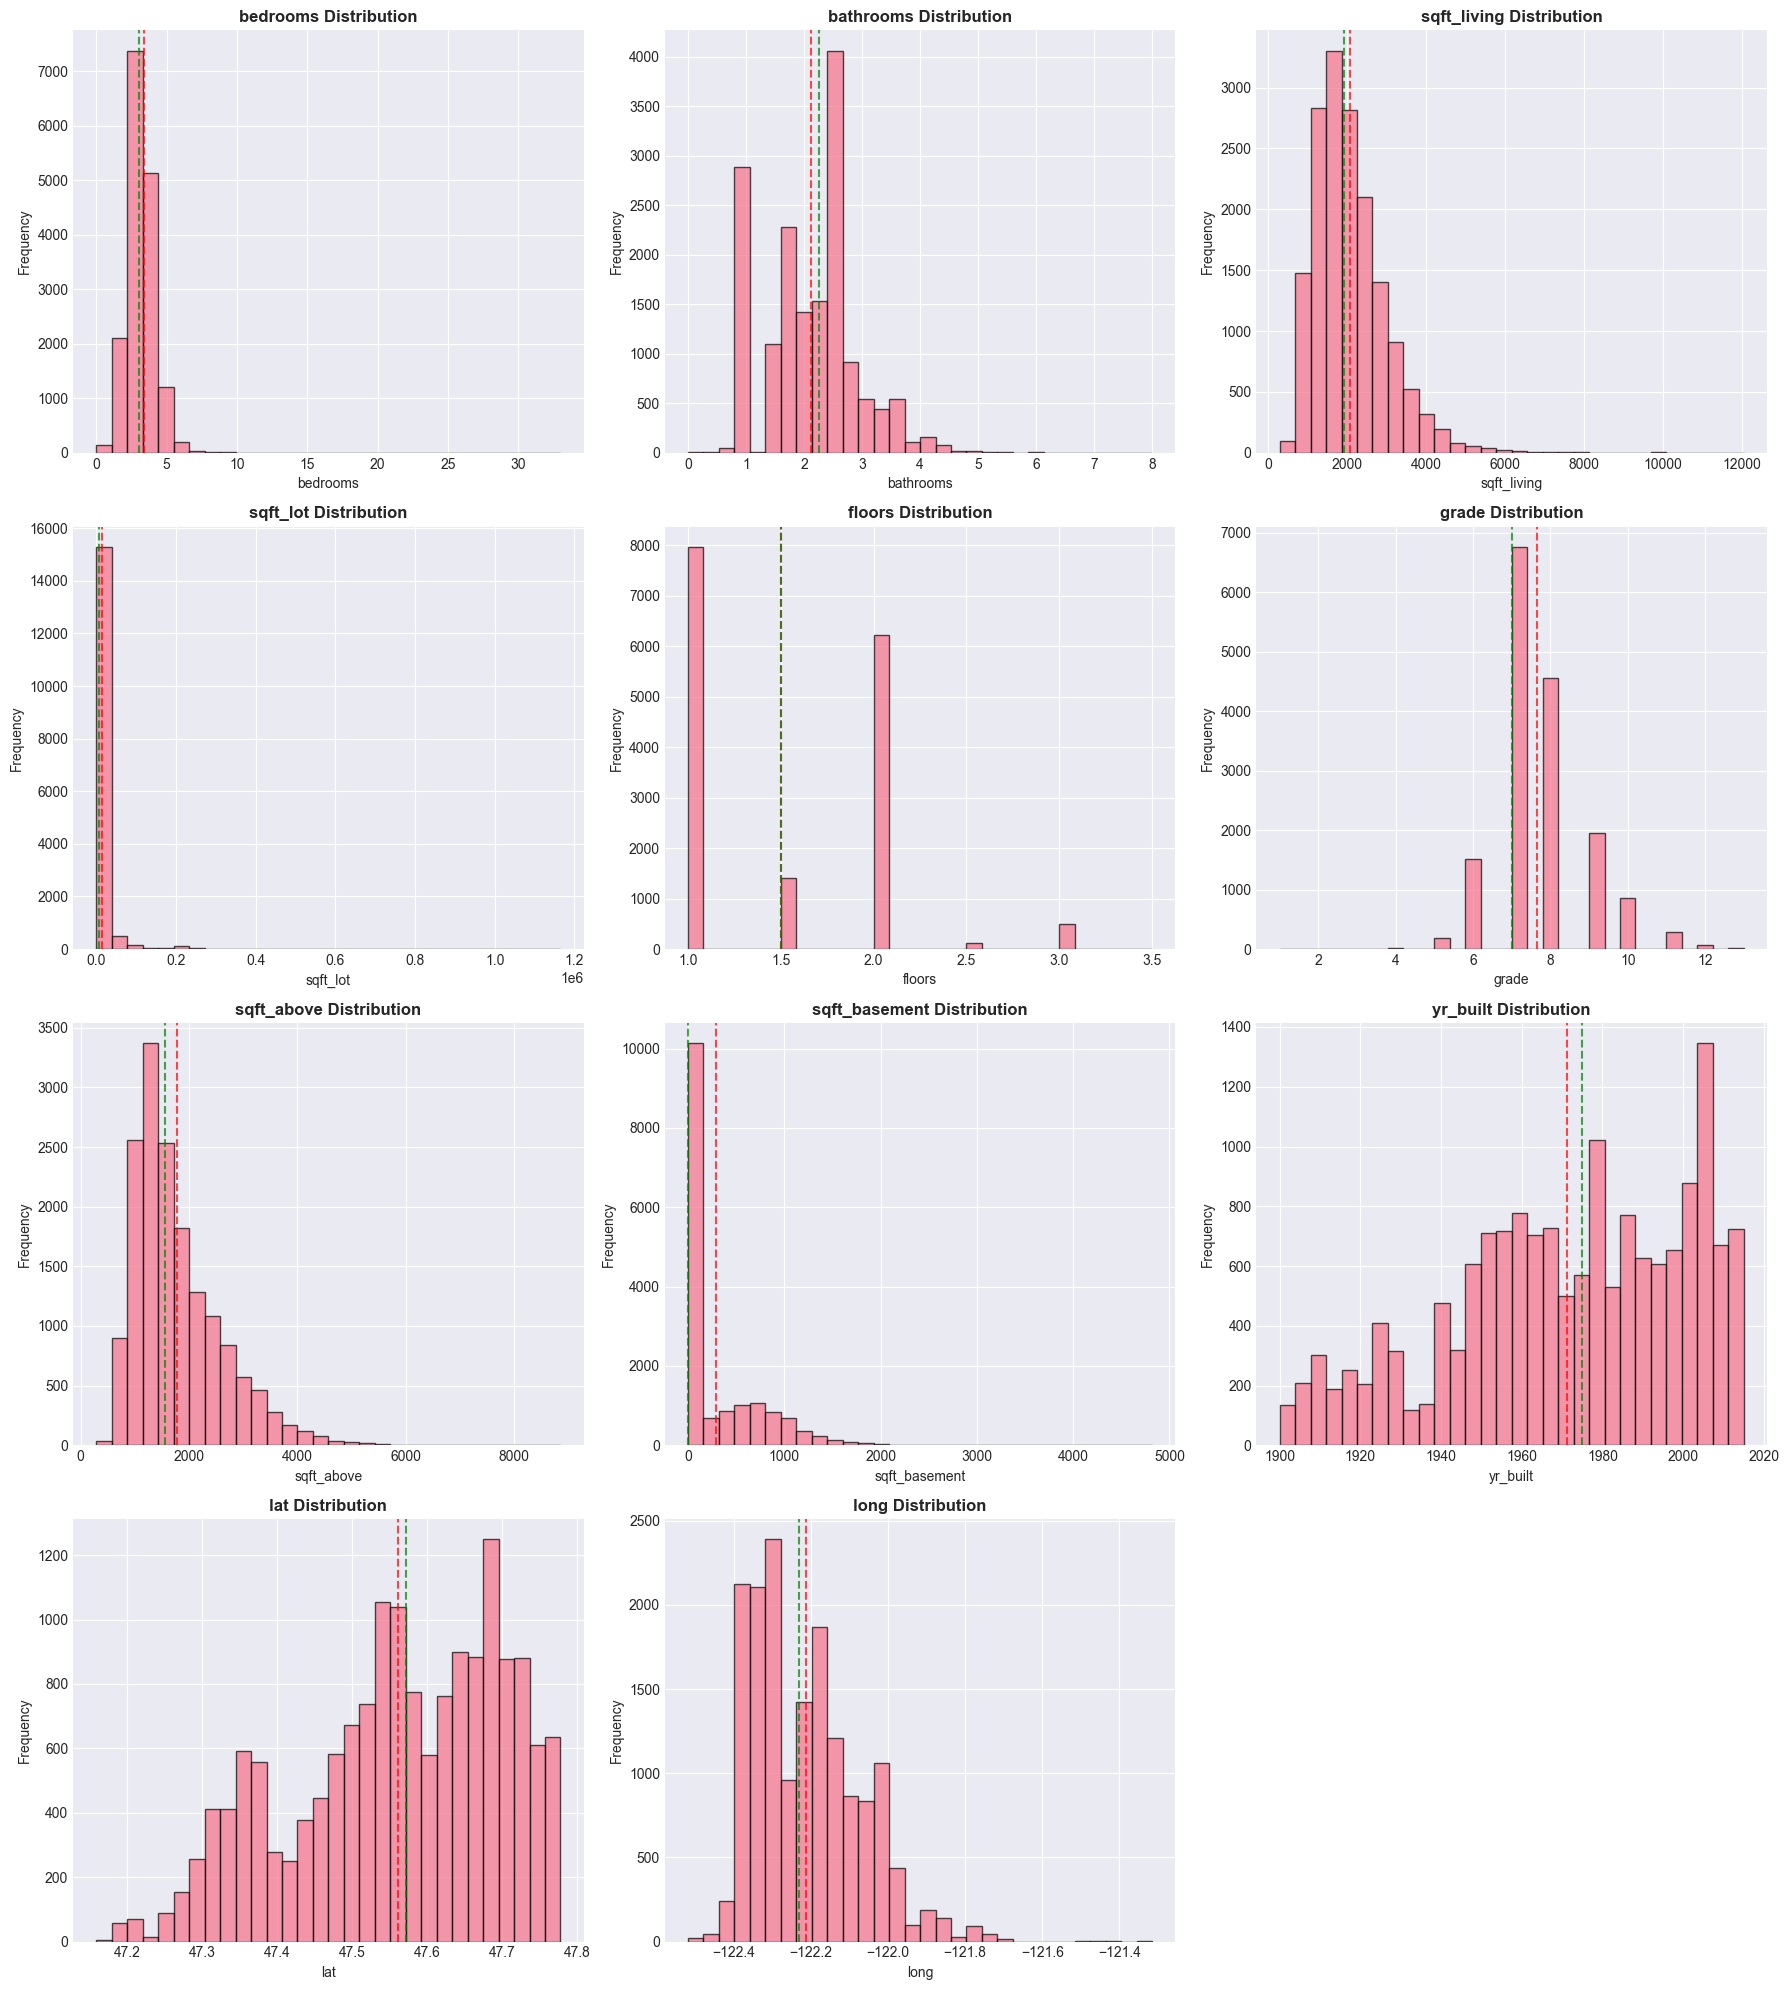

In [5]:
# Feature Distribution Analysis
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                    'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long']

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    if feature in df.columns:
        axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', alpha=0.7)
        axes[idx].axvline(df[feature].median(), color='green', linestyle='--', alpha=0.7)

# Remove extra subplots
for idx in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


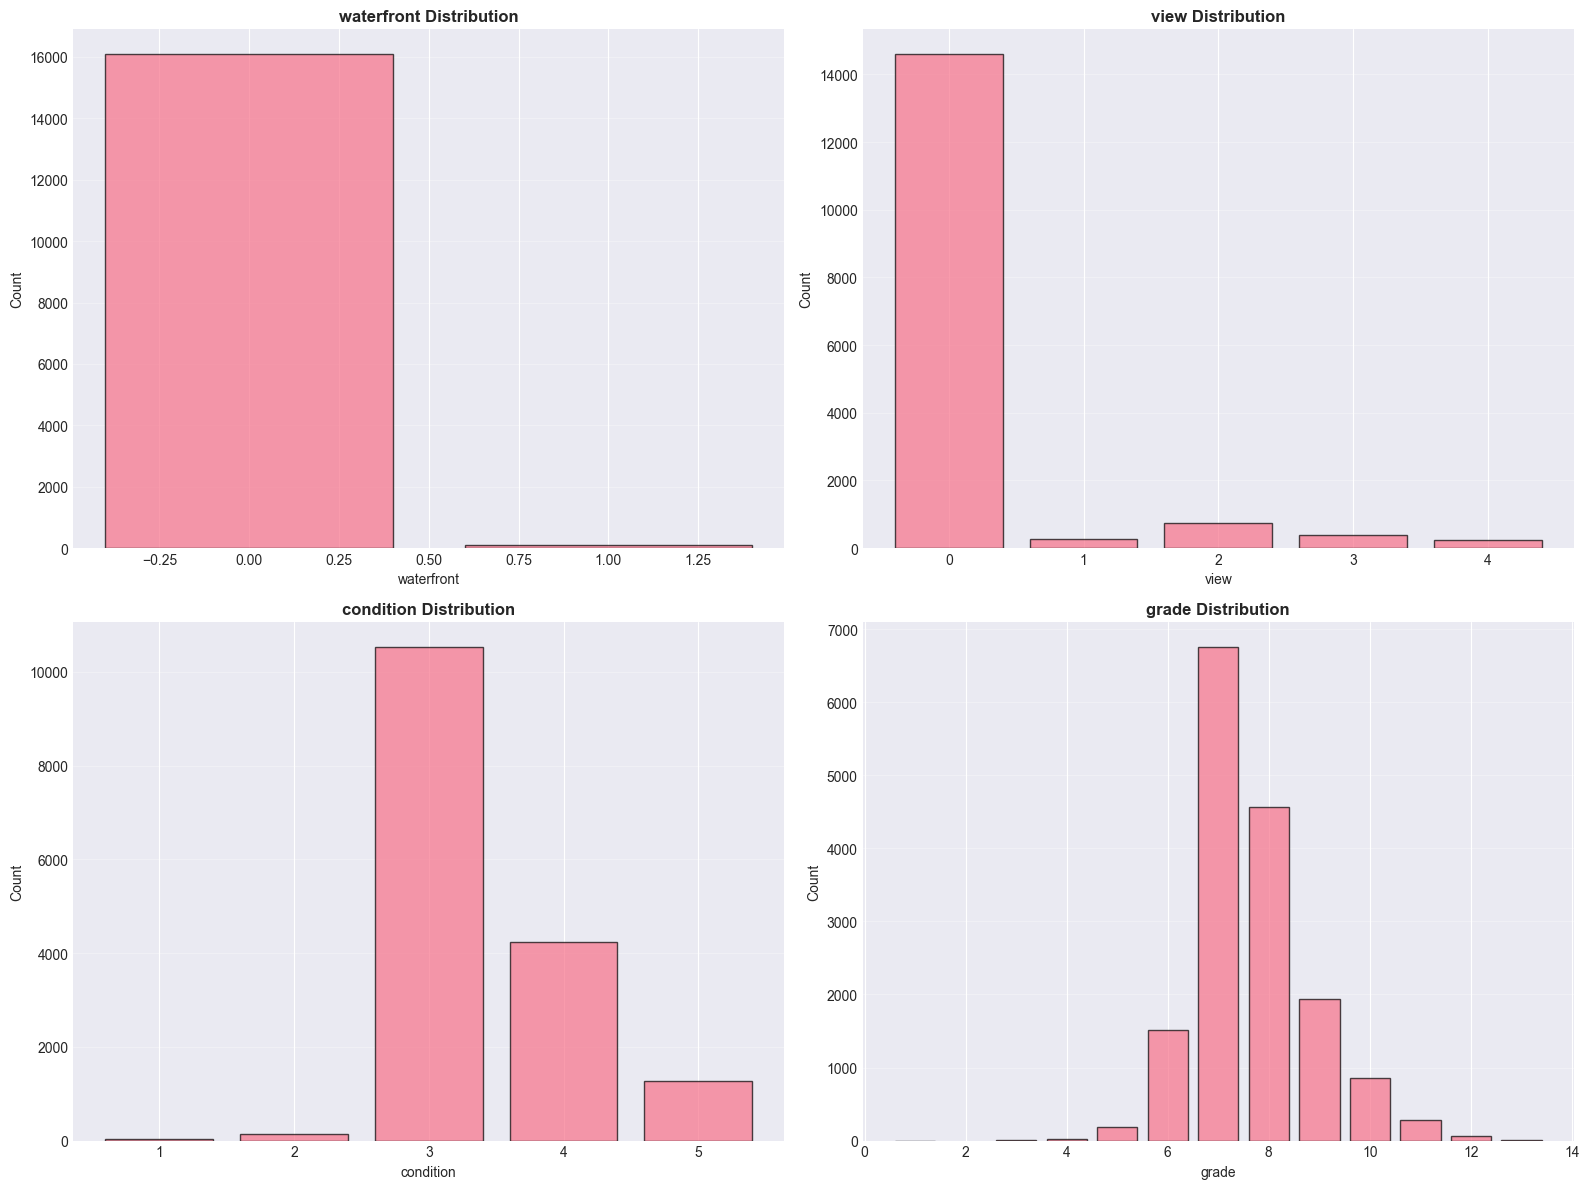

In [6]:
# Categorical Features Analysis
categorical_features = ['waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    if feature in df.columns:
        value_counts = df[feature].value_counts().sort_index()
        axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Count')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


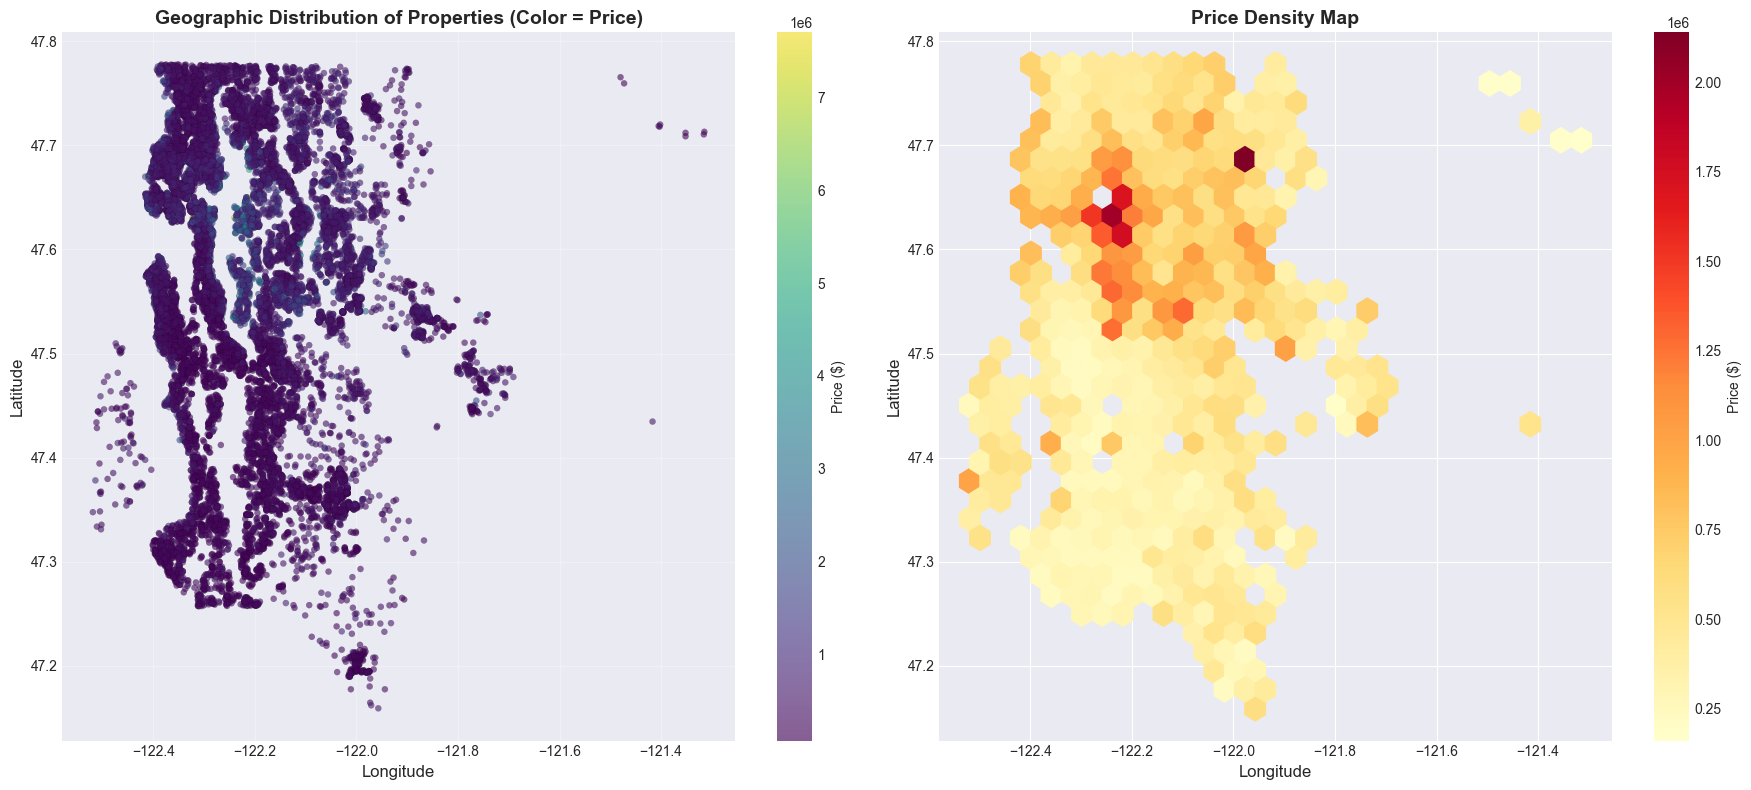


Luxury Hub Center (Top 10% Properties):
Latitude: 47.6175, Longitude: -122.2163


In [7]:
# Geospatial Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Scatter plot: Location vs Price
scatter = axes[0].scatter(df['long'], df['lat'], c=df['price'], 
                         cmap='viridis', alpha=0.6, s=20, edgecolors='black', linewidth=0.1)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].set_title('Geographic Distribution of Properties (Color = Price)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[0], label='Price ($)')
axes[0].grid(alpha=0.3)

# Price by location (density)
axes[1].hexbin(df['long'], df['lat'], C=df['price'], gridsize=30, cmap='YlOrRd')
axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Latitude', fontsize=12)
axes[1].set_title('Price Density Map', fontsize=14, fontweight='bold')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Price ($)')

plt.tight_layout()
plt.show()

# Identify luxury hub (top 10% most expensive)
top_10_percent = df.nlargest(int(len(df) * 0.1), 'price')
luxury_lat = top_10_percent['lat'].mean()
luxury_long = top_10_percent['long'].mean()
print(f"\nLuxury Hub Center (Top 10% Properties):")
print(f"Latitude: {luxury_lat:.4f}, Longitude: {luxury_long:.4f}")


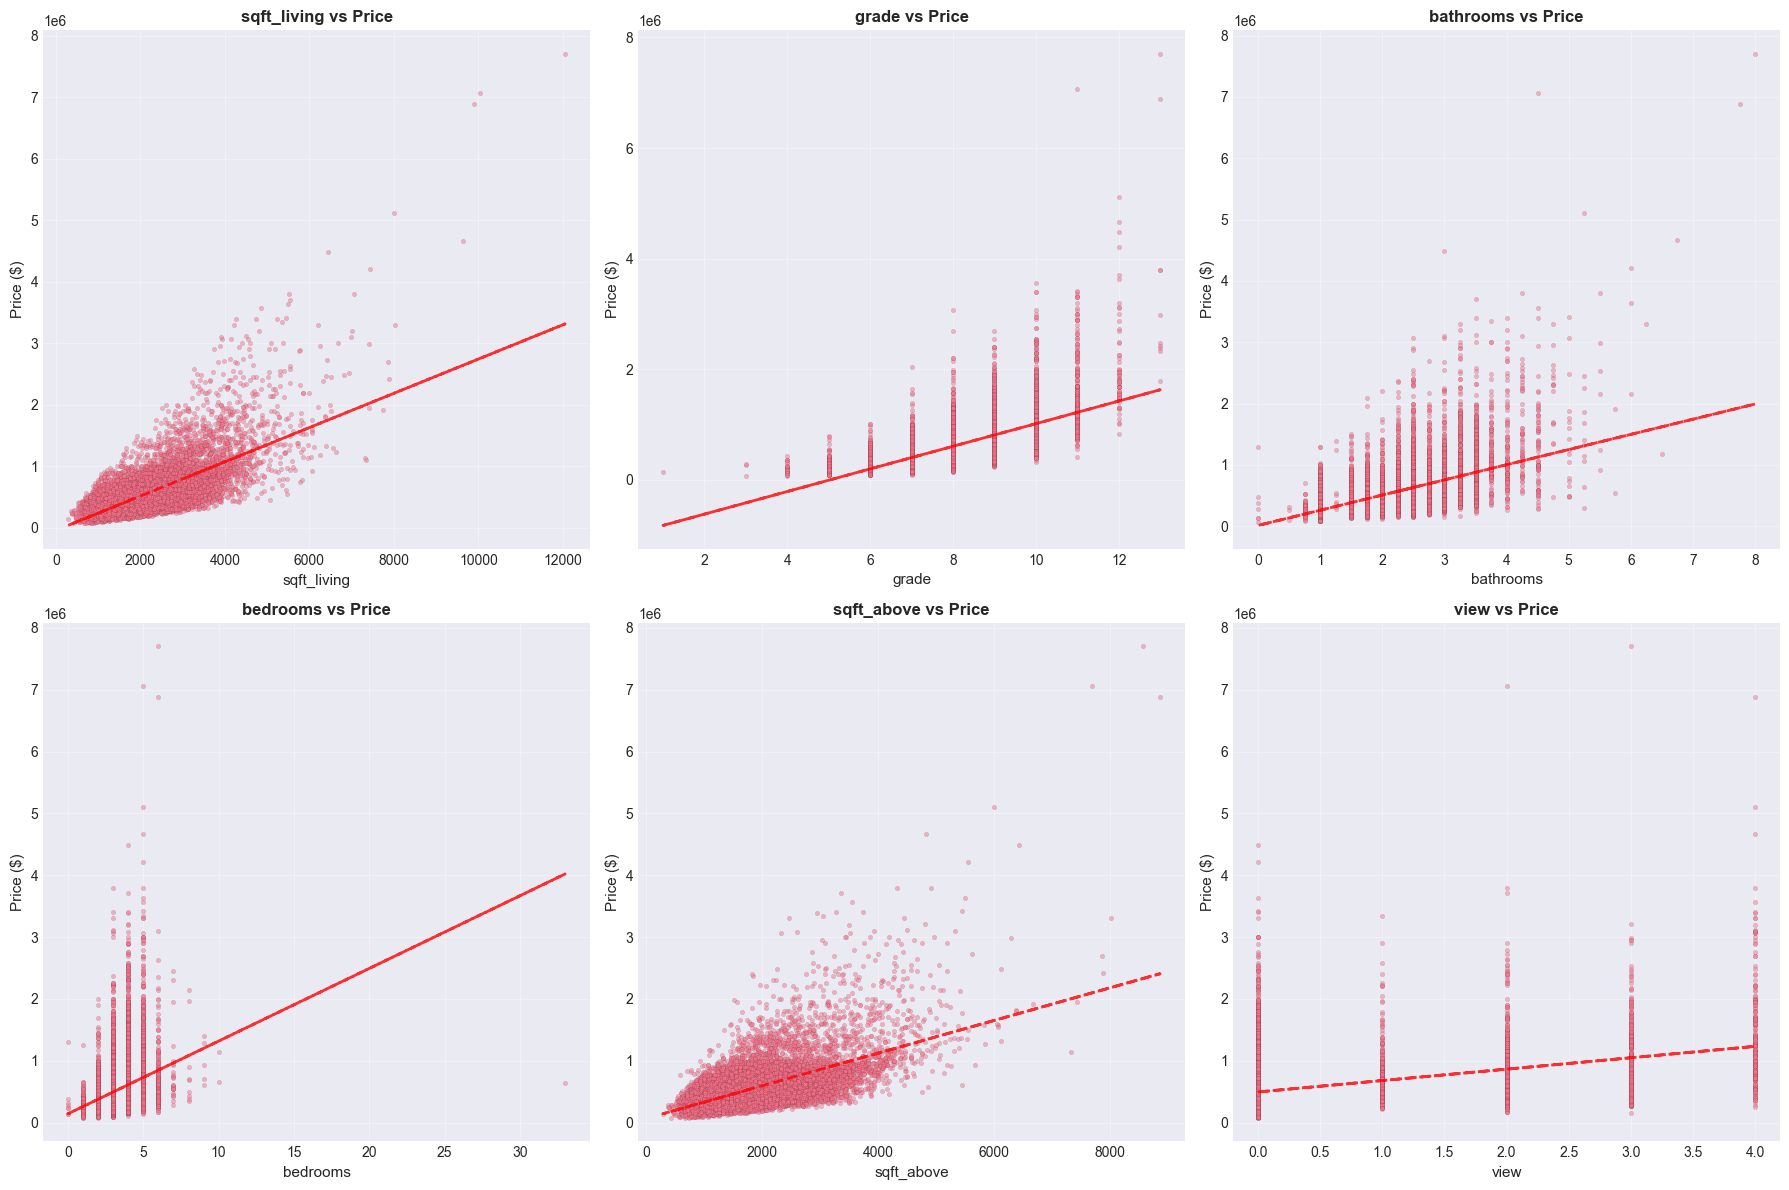

In [8]:
# Relationship between key features and price
key_features = ['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'sqft_above', 'view']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        axes[idx].scatter(df[feature], df['price'], alpha=0.5, s=10, edgecolors='black', linewidth=0.1)
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('Price ($)', fontsize=11)
        axes[idx].set_title(f'{feature} vs Price', fontweight='bold')
        axes[idx].grid(alpha=0.3)
        
        # Add trend line
        z = np.polyfit(df[feature], df['price'], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


## 3. Data Cleaning and Preprocessing


In [9]:
# Create a copy for preprocessing
df_processed = df.copy()

print("="*60)
print("DATA CLEANING")
print("="*60)

# Check for missing values
print(f"\nMissing values before cleaning:")
missing_before = df_processed.isnull().sum()
print(missing_before[missing_before > 0])

# Fill missing values with median for numeric columns
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())

print(f"\nMissing values after cleaning:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])

print(f"\nDataset shape: {df_processed.shape}")


DATA CLEANING

Missing values before cleaning:
Series([], dtype: int64)

Missing values after cleaning:
Series([], dtype: int64)

Dataset shape: (16209, 21)


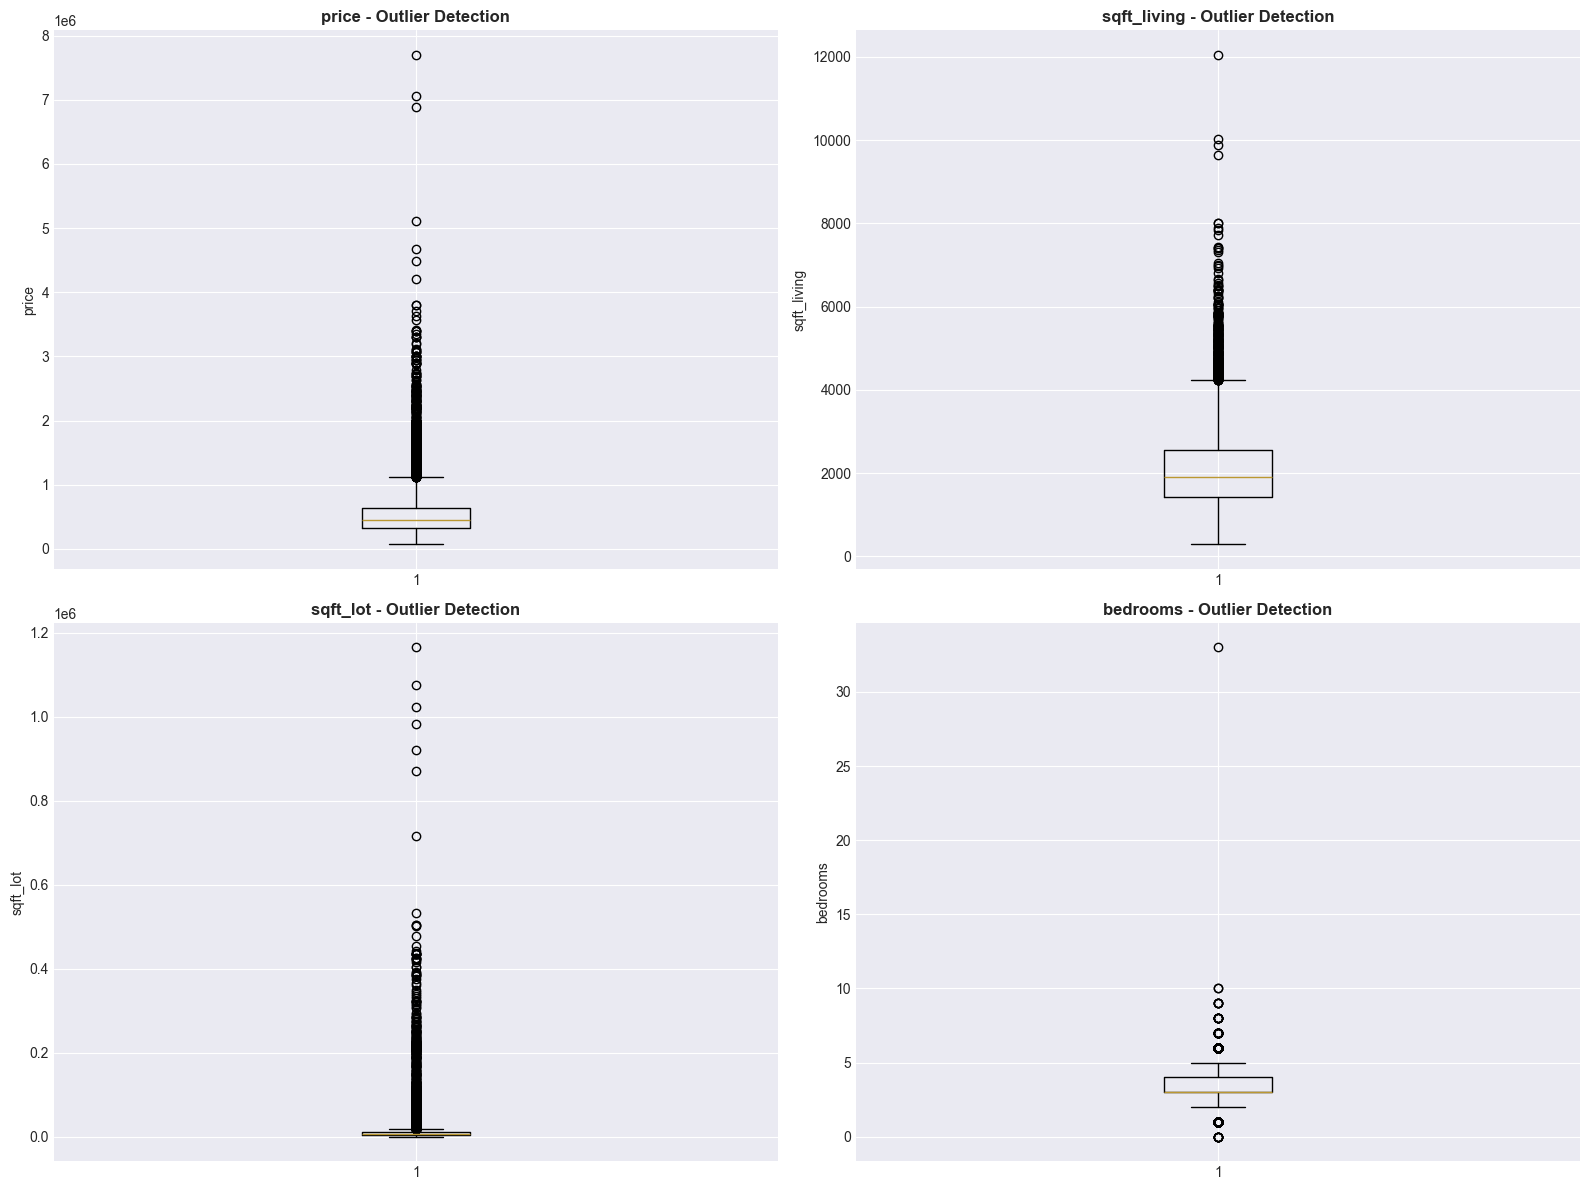


Outlier Analysis (IQR Method):
price: 850 outliers (5.24%) | Range: [-160000.00, 1120000.00]
sqft_living: 413 outliers (2.55%) | Range: [-250.00, 4230.00]
sqft_lot: 1799 outliers (11.10%) | Range: [-3436.50, 19071.50]


In [10]:
# Outlier Detection and Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplots for key features
key_numeric = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']
for idx, feature in enumerate(key_numeric[:4]):
    if feature in df_processed.columns:
        axes[idx//2, idx%2].boxplot(df_processed[feature], vert=True)
        axes[idx//2, idx%2].set_title(f'{feature} - Outlier Detection', fontweight='bold')
        axes[idx//2, idx%2].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nOutlier Analysis (IQR Method):")
for col in ['price', 'sqft_living', 'sqft_lot']:
    if col in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, col)
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_processed)*100:.2f}%) | Range: [{lower:.2f}, {upper:.2f}]")


## 4. Feature Engineering


In [11]:
# Log Transformation for Skewed Features
print("="*60)
print("LOG TRANSFORMATION")
print("="*60)

# Features that typically benefit from log transformation
transform_cols = ['price', 'sqft_living', 'sqft_above', 'sqft_living15', 
                  'sqft_lot', 'sqft_lot15', 'sqft_basement']

# Check skewness before transformation
print("\nSkewness Before Transformation:")
for col in transform_cols:
    if col in df_processed.columns:
        skew_before = df_processed[col].skew()
        print(f"{col:20s}: {skew_before:7.4f}")

# Apply log transformation: log(1 + x) to handle zeros
df_transformed = df_processed.copy()
for col in transform_cols:
    if col in df_transformed.columns:
        df_transformed[col] = np.log1p(df_transformed[col])

# Check skewness after transformation
print("\nSkewness After Transformation:")
for col in transform_cols:
    if col in df_transformed.columns:
        skew_after = df_transformed[col].skew()
        print(f"{col:20s}: {skew_after:7.4f}")

print("\n✓ Log transformation complete!")


LOG TRANSFORMATION

Skewness Before Transformation:
price               :  4.0331
sqft_living         :  1.3788
sqft_above          :  1.4304
sqft_living15       :  1.0949
sqft_lot            : 11.4072
sqft_lot15          :  8.7516
sqft_basement       :  1.5715

Skewness After Transformation:
price               :  0.4115
sqft_living         : -0.0486
sqft_above          :  0.2500
sqft_living15       :  0.1912
sqft_lot            :  0.9336
sqft_lot15          :  0.9701
sqft_basement       :  0.4939

✓ Log transformation complete!


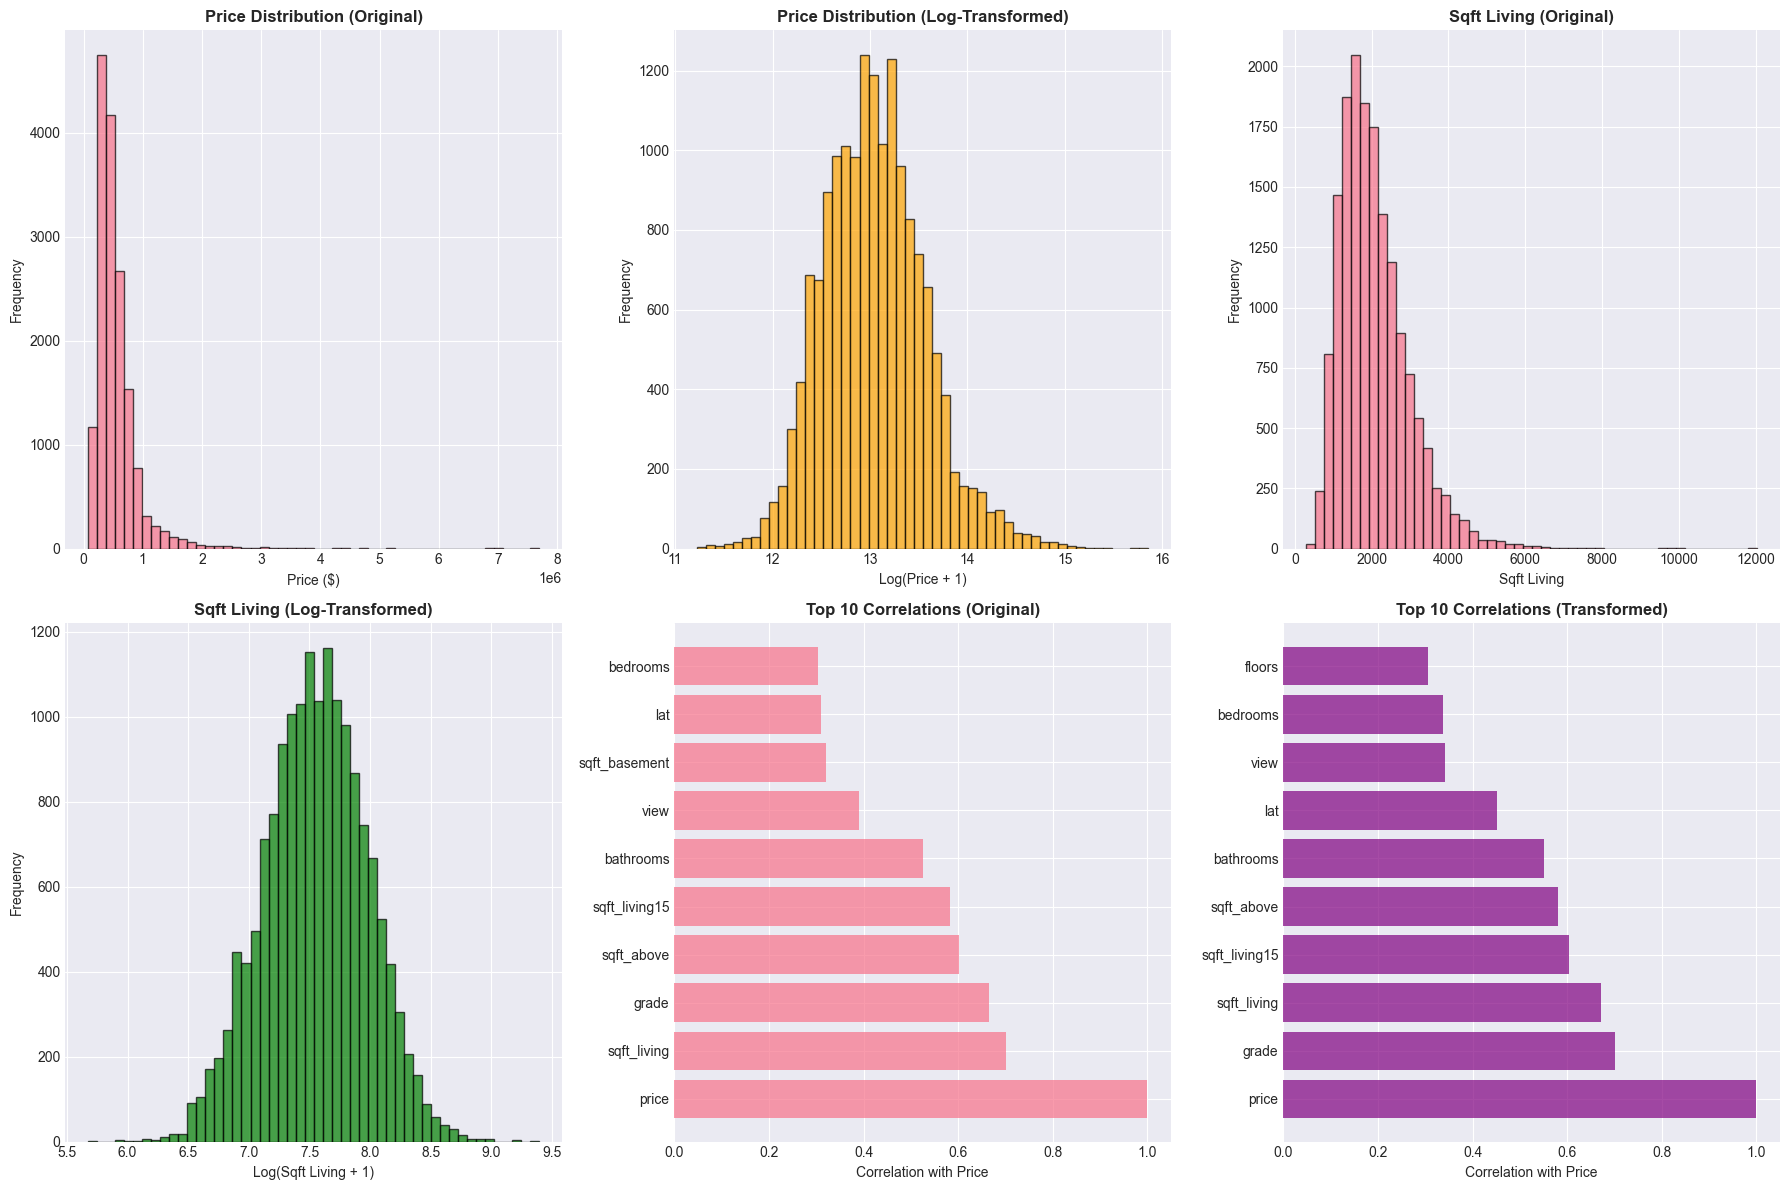

In [12]:

# Visualize transformation effect
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price transformation
axes[0, 0].hist(df_processed['price'], bins=50, alpha=0.7, label='Original', edgecolor='black')
axes[0, 0].set_title('Price Distribution (Original)', fontweight='bold')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df_transformed['price'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Price Distribution (Log-Transformed)', fontweight='bold')
axes[0, 1].set_xlabel('Log(Price + 1)')
axes[0, 1].set_ylabel('Frequency')

# Sqft_living transformation
axes[0, 2].hist(df_processed['sqft_living'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Sqft Living (Original)', fontweight='bold')
axes[0, 2].set_xlabel('Sqft Living')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(df_transformed['sqft_living'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].set_title('Sqft Living (Log-Transformed)', fontweight='bold')
axes[1, 0].set_xlabel('Log(Sqft Living + 1)')
axes[1, 0].set_ylabel('Frequency')

# Correlation comparison
df_numeric_orig = df_processed.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')
df_numeric_trans = df_transformed.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')

orig_corr = df_numeric_orig.corr()['price'].sort_values(ascending=False)
trans_corr = df_numeric_trans.corr()['price'].sort_values(ascending=False)

axes[1, 1].barh(range(len(orig_corr.head(10))), orig_corr.head(10).values, alpha=0.7, label='Original')
axes[1, 1].set_yticks(range(len(orig_corr.head(10))))
axes[1, 1].set_yticklabels(orig_corr.head(10).index)
axes[1, 1].set_title('Top 10 Correlations (Original)', fontweight='bold')
axes[1, 1].set_xlabel('Correlation with Price')

axes[1, 2].barh(range(len(trans_corr.head(10))), trans_corr.head(10).values, alpha=0.7, color='purple')
axes[1, 2].set_yticks(range(len(trans_corr.head(10))))
axes[1, 2].set_yticklabels(trans_corr.head(10).index)
axes[1, 2].set_title('Top 10 Correlations (Transformed)', fontweight='bold')
axes[1, 2].set_xlabel('Correlation with Price')

plt.tight_layout()
plt.show()


In [13]:
# Spatial Feature Engineering
print("="*60)
print("SPATIAL FEATURE ENGINEERING")
print("="*60)

# 1. Distance from Luxury Hub (Top 10% most expensive properties)
top_10_percent = df_transformed.nlargest(int(len(df_transformed) * 0.1), 'price')
center_lat = top_10_percent['lat'].mean()
center_long = top_10_percent['long'].mean()

df_transformed['dist_from_luxury_hub'] = np.sqrt(
    (df_transformed['lat'] - center_lat)**2 + (df_transformed['long'] - center_long)**2
)

print(f"Luxury Hub Center: Lat={center_lat:.4f}, Long={center_long:.4f}")
print(f"Distance from Luxury Hub - Mean: {df_transformed['dist_from_luxury_hub'].mean():.4f}")
print(f"Distance from Luxury Hub - Std: {df_transformed['dist_from_luxury_hub'].std():.4f}")

# 2. Price per square foot (using original values before log transform)
# We'll use the original price and sqft_living for this calculation
df_transformed['price_per_sqft'] = np.expm1(df_transformed['price']) / np.expm1(df_transformed['sqft_living'])
df_transformed['price_per_sqft'] = np.log1p(df_transformed['price_per_sqft'])  # Log transform this too

# 3. Age of property
df_transformed['property_age'] = 2024 - df_transformed['yr_built']  # Assuming current year is 2024
df_transformed['renovation_age'] = df_transformed['yr_renovated'].apply(
    lambda x: 2024 - x if x > 0 else 0
)

# 4. Total rooms
df_transformed['total_rooms'] = df_transformed['bedrooms'] + df_transformed['bathrooms']

# 5. Living space ratio
df_transformed['living_ratio'] = df_transformed['sqft_living'] / (df_transformed['sqft_lot'] + 1)

print("\n✓ Spatial and derived features created!")
print(f"New features added: dist_from_luxury_hub, price_per_sqft, property_age, renovation_age, total_rooms, living_ratio")


SPATIAL FEATURE ENGINEERING
Luxury Hub Center: Lat=47.6175, Long=-122.2163
Distance from Luxury Hub - Mean: 0.1831
Distance from Luxury Hub - Std: 0.0920

✓ Spatial and derived features created!
New features added: dist_from_luxury_hub, price_per_sqft, property_age, renovation_age, total_rooms, living_ratio


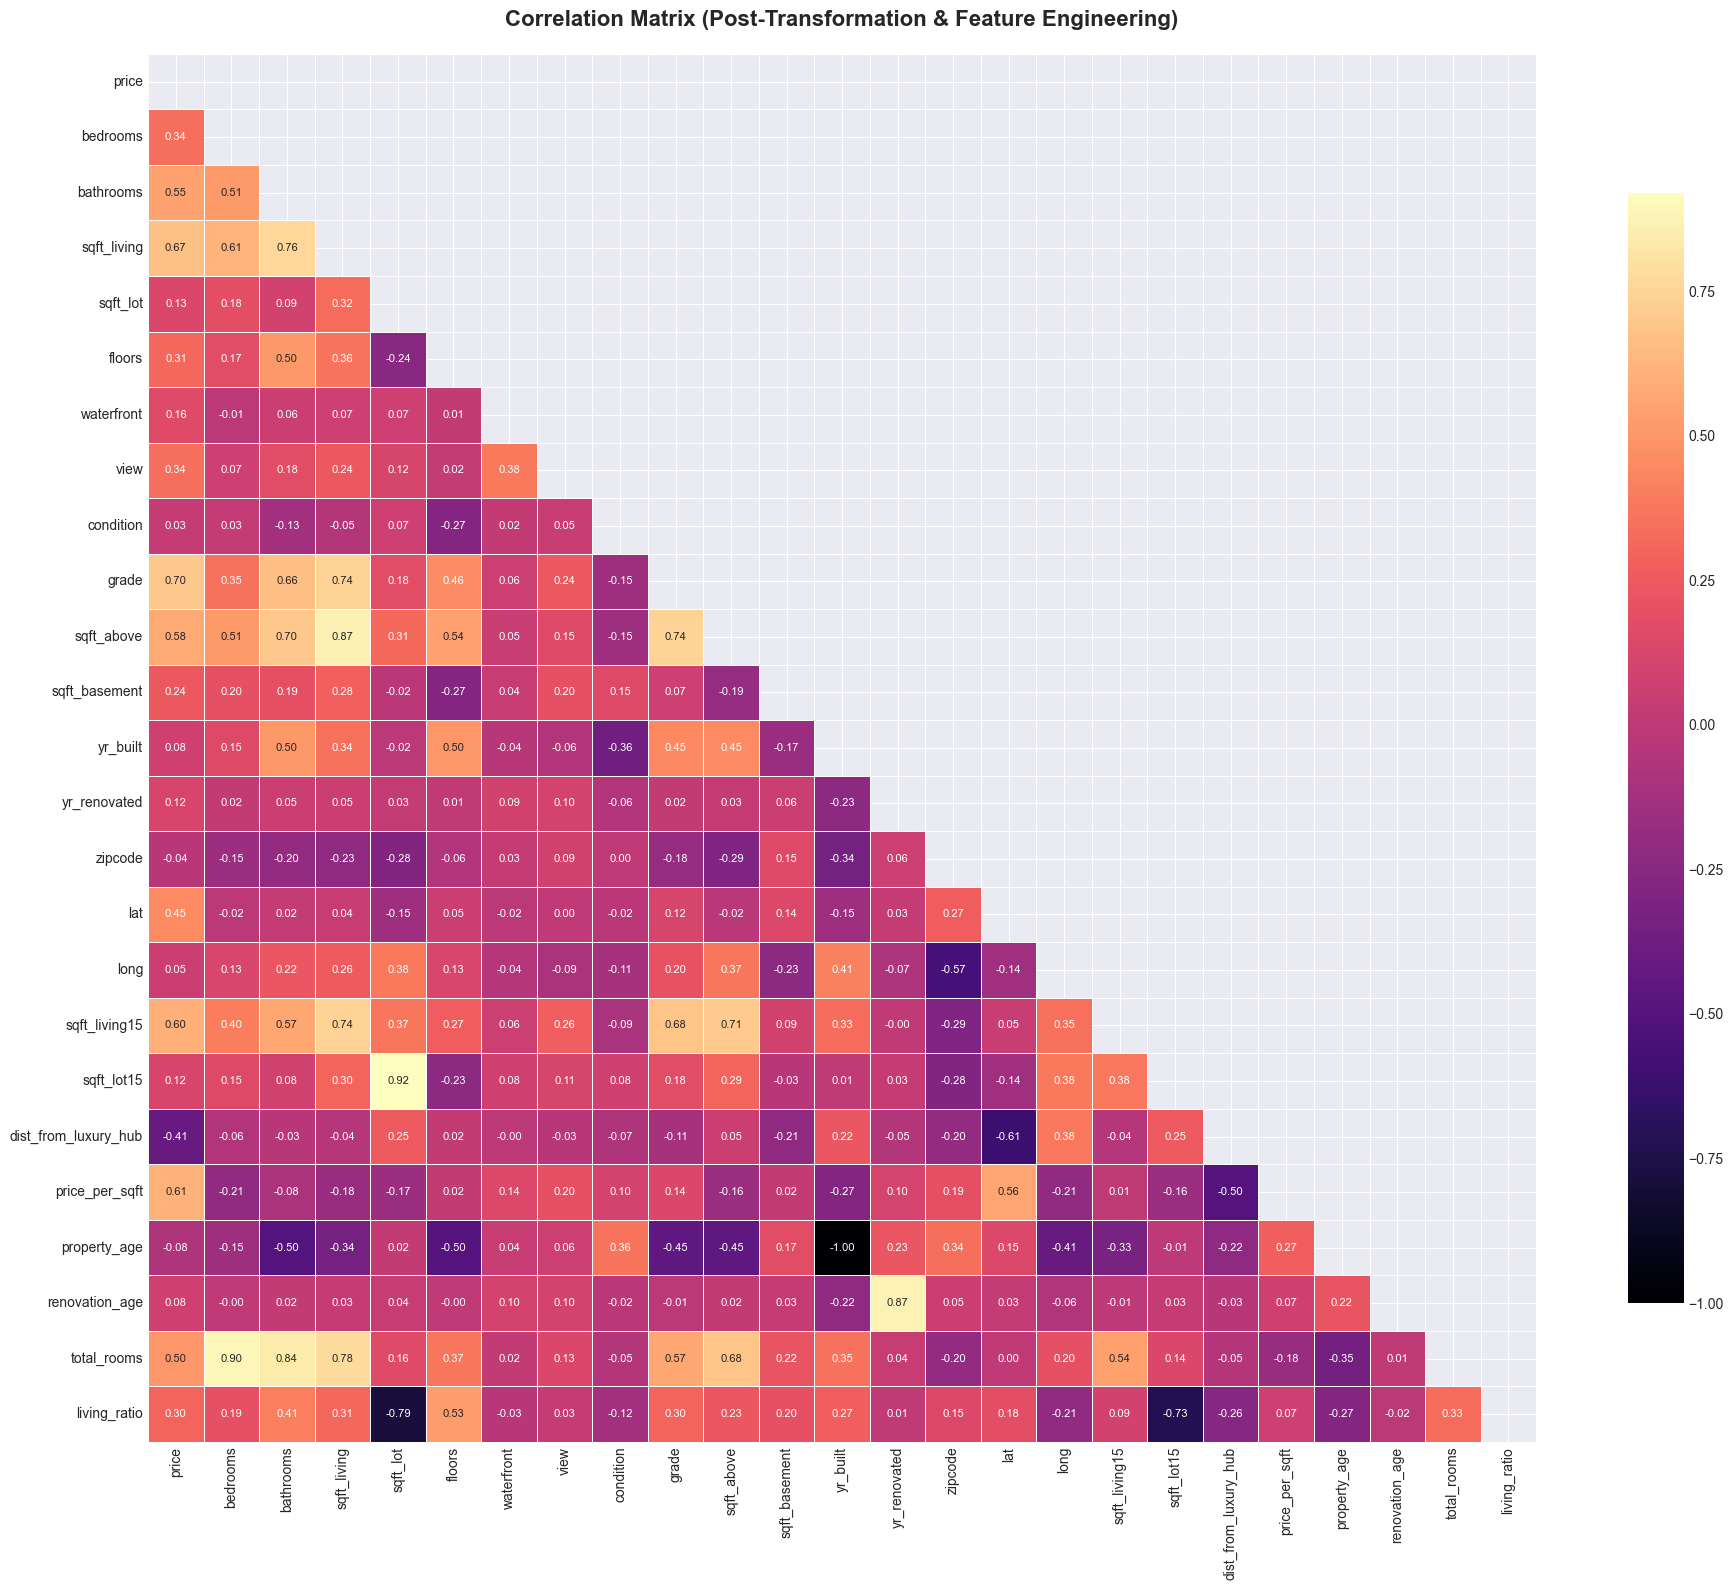


TOP CORRELATIONS WITH PRICE (After Transformation & Engineering)
grade                         :  0.7002
sqft_living                   :  0.6714
price_per_sqft                :  0.6073
sqft_living15                 :  0.6036
sqft_above                    :  0.5813
bathrooms                     :  0.5505
total_rooms                   :  0.4977
lat                           :  0.4525
view                          :  0.3409
bedrooms                      :  0.3377
floors                        :  0.3053
living_ratio                  :  0.2996
sqft_basement                 :  0.2398
waterfront                    :  0.1612
sqft_lot                      :  0.1342
sqft_lot15                    :  0.1197
yr_renovated                  :  0.1194
renovation_age                :  0.0790
yr_built                      :  0.0764
long                          :  0.0529
condition                     :  0.0330
zipcode                       : -0.0398
property_age                  : -0.0764
dist_from_luxu

In [14]:
# Correlation Analysis After Feature Engineering
df_numeric_final = df_transformed.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')
df_numeric_final = df_numeric_final.fillna(df_numeric_final.median())

corr_final = df_numeric_final.corr()

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_final, dtype=bool))
sns.heatmap(corr_final, mask=mask, annot=True, fmt=".2f", cmap='magma', 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}, annot_kws={'size': 8})
plt.title("Correlation Matrix (Post-Transformation & Feature Engineering)", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Price correlations after transformation
price_corr_final = corr_final['price'].sort_values(ascending=False)
print("\n" + "="*60)
print("TOP CORRELATIONS WITH PRICE (After Transformation & Engineering)")
print("="*60)
for feature, corr in price_corr_final.items():
    if feature != 'price':
        print(f"{feature:30s}: {corr:7.4f}")


## 5. Feature Selection


In [15]:
# Feature Selection: Remove low-correlation and redundant features
print("="*60)
print("FEATURE SELECTION")
print("="*60)

# Features to drop based on low correlation and domain knowledge
cols_to_drop = [
    'id', 'date', 'zipcode', 'condition', 'long', 
    'yr_built', 'sqft_lot', 'sqft_lot15'
]

# Drop columns
df_final = df_transformed.drop(columns=[c for c in cols_to_drop if c in df_transformed.columns])

print(f"\nFeatures removed: {cols_to_drop}")
print(f"\nRemaining features: {len(df_final.columns)}")
print(f"\nFinal feature list:")
for i, col in enumerate(df_final.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nFinal dataset shape: {df_final.shape}")


FEATURE SELECTION

Features removed: ['id', 'date', 'zipcode', 'condition', 'long', 'yr_built', 'sqft_lot', 'sqft_lot15']

Remaining features: 19

Final feature list:
 1. price
 2. bedrooms
 3. bathrooms
 4. sqft_living
 5. floors
 6. waterfront
 7. view
 8. grade
 9. sqft_above
10. sqft_basement
11. yr_renovated
12. lat
13. sqft_living15
14. dist_from_luxury_hub
15. price_per_sqft
16. property_age
17. renovation_age
18. total_rooms
19. living_ratio

Final dataset shape: (16209, 19)


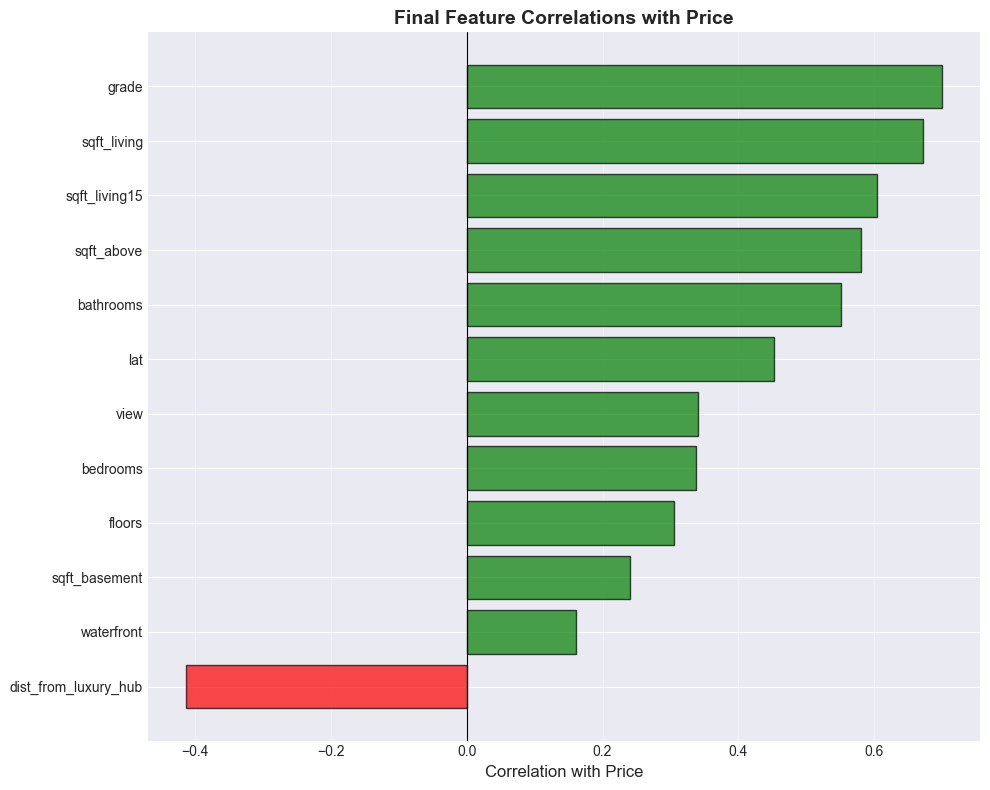


PREPROCESSING COMPLETE!
✓ Data cleaned and transformed
✓ Features engineered
✓ Final feature set: 12 features
✓ Ready for model training


In [16]:
# Final Feature Importance Visualization
final_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 
    'sqft_living15', 'floors', 'lat', 'grade', 'view', 
    'waterfront', 'sqft_basement', 'dist_from_luxury_hub'
]

# Get correlations for final features
final_corr = df_final[final_features + ['price']].corr()['price'].drop('price').sort_values(ascending=True)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in final_corr.values]
plt.barh(range(len(final_corr)), final_corr.values, color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(final_corr)), final_corr.index)
plt.xlabel('Correlation with Price', fontsize=12)
plt.title('Final Feature Correlations with Price', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
print(f"✓ Data cleaned and transformed")
print(f"✓ Features engineered")
print(f"✓ Final feature set: {len(final_features)} features")
print(f"✓ Ready for model training")
print("="*60)
